In [322]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder


In [323]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

In [324]:
df = pd.read_csv('df_clear.csv')
df1 = pd.read_csv('df_clear.csv') 
print(df.shape)
print(df1.shape)

(21613, 18)
(21613, 18)


In [325]:
target = df1['price']
predictors = list(set(list(df.columns))-set(target))

In [326]:
predictors

['zipcode_98004',
 'sqft_basement',
 'price',
 'floors',
 'view_qual',
 'space_int_15',
 'interior_space',
 'lat',
 'zipcode_98039',
 'zipcode_98006',
 'space_above',
 'yr_renovated',
 'bathrooms',
 'see_sea',
 'grade',
 'zipcode_98040',
 'zipcode_98112',
 'bedrooms']

Ridge

The cost function for ridge regression:

Min(||Y – X(theta)||^2 + λ||theta||^2)

    The bias increases as λ increases.
    The variance decreases as λ increases.

In [327]:
X = df.drop('price', axis=1)
y = df.price
X_train, X_test, y_train, y_test = train_test_split(X,y)
num_col = list(X.select_dtypes(include=[float,int]).columns)
cat_col = list(X.select_dtypes(include=[object]).columns)
my_num_pipe = make_pipeline(StandardScaler(), PolynomialFeatures())
preprocessing = ColumnTransformer([
    ("one_hot", OneHotEncoder(),cat_col),
    ("scaling", my_num_pipe, num_col)
])

In [328]:
my_pipe_lr = make_pipeline(preprocessing, LinearRegression())

In [329]:
my_pipe_lasso = make_pipeline(preprocessing, Lasso())


In [330]:
my_pipe_lasso.fit(X_train, y_train)

/home/machtelinck/miniconda3/envs/kmp/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.714e+14, tolerance: 2.127e+11
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one_hot', OneHotEncoder(),
                                                  []),
                                                 ('scaling',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('polynomialfeatures',
                                                                   PolynomialFeatures())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'interior_space', 'floors',
                                                   'see_sea', 'view_qual',
                                                   'grade', 'space_above',
                                                   'sqft_basement',
                                                   'yr_renovated', 'lat',
                                                   'space_int_15',
                                                   'zipcode_98004',
                                                   'zipcode_98006',
                                                   'zipcode_98039',
                                                   'zipcode_98040',
                                                   'zipcode_98112'])])),
                ('lasso', Lasso())])

In [331]:
my_pipe_lasso.score(X_test, y_test)

0.8345220043126954

In [332]:
y_pred = my_pipe_lasso.predict(X_train)



In [333]:
type(y_train)

pandas.core.series.Series

In [334]:
residual = (y_train - y_pred).abs().sort_values()

In [335]:
to_drop = residual[residual > 500000].index

In [336]:
df_cleaned.columns

Index(['price', 'bedrooms', 'bathrooms', 'interior_space', 'floors', 'see_sea',
       'view_qual', 'grade', 'space_above', 'sqft_basement', 'yr_renovated',
       'lat', 'space_int_15', 'zipcode_98004', 'zipcode_98006',
       'zipcode_98039', 'zipcode_98040', 'zipcode_98112'],
      dtype='object')

In [337]:
df_cleaned = df.drop(to_drop)

/home/machtelinck/miniconda3/envs/kmp/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


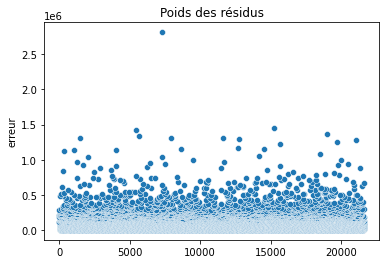

In [338]:
sns.scatterplot(residual.index, residual)
plt.title('Poids des résidus')
plt.ylabel('erreur')
plt.show()

In [339]:
residual[residual.index == 15870]

15870    91500.099061
Name: price, dtype: float64

In [340]:
X = df_cleaned.drop('price',axis =1)
y = df_cleaned.price
X_train, X_test, y_train, y_test = train_test_split(X,y)
num_col = list(X.select_dtypes(include=[float,int]).columns)
cat_col = list(X.select_dtypes(include=[object]).columns)
my_num_pipe = make_pipeline(StandardScaler(), PolynomialFeatures())
preprocessing = ColumnTransformer([
    ("one_hot", OneHotEncoder(),cat_col),
    ("scaling", my_num_pipe, num_col)
])

In [341]:
my_pipe_lasso = make_pipeline(preprocessing, Lasso())

In [342]:
my_pipe_lasso.fit(X_train, y_train)

/home/machtelinck/miniconda3/envs/kmp/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.275e+14, tolerance: 1.808e+11
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one_hot', OneHotEncoder(),
                                                  []),
                                                 ('scaling',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('polynomialfeatures',
                                                                   PolynomialFeatures())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'interior_space', 'floors',
                                                   'see_sea', 'view_qual',
                                                   'grade', 'space_above',
                                                   'sqft_basement',
                                                   'yr_renovated', 'lat',
                                                   'space_int_15',
                                                   'zipcode_98004',
                                                   'zipcode_98006',
                                                   'zipcode_98039',
                                                   'zipcode_98040',
                                                   'zipcode_98112'])])),
                ('lasso', Lasso())])

In [343]:
my_pipe_lasso.score(X_test, y_test)

0.855862074011059

In [344]:
X_train.columns

Index(['bedrooms', 'bathrooms', 'interior_space', 'floors', 'see_sea',
       'view_qual', 'grade', 'space_above', 'sqft_basement', 'yr_renovated',
       'lat', 'space_int_15', 'zipcode_98004', 'zipcode_98006',
       'zipcode_98039', 'zipcode_98040', 'zipcode_98112'],
      dtype='object')

In [345]:
X_train.to_csv("X1_train.csv")

In [346]:
X_test.to_csv("X1_test.csv")

In [347]:
y_test

17614     228500.0
4038      390000.0
5590      725000.0
20296     950000.0
2799      415000.0
           ...    
13258     260000.0
7581      678940.0
7369      295000.0
18628    1600000.0
11516     880000.0
Name: price, Length: 5357, dtype: float64

In [348]:
import pickle 
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(my_pipe_lasso, file)

In [349]:
my_pipe_lasso

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one_hot', OneHotEncoder(),
                                                  []),
                                                 ('scaling',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('polynomialfeatures',
                                                                   PolynomialFeatures())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'interior_space', 'floors',
                                                   'see_sea', 'view_qual',
                                                   'grade', 'space_above',
                                                   'sqft_basement',
                                                   'yr_renovated', 'lat',
                                                   'space_int_15',
                                                   'zipcode_98004',
                                                   'zipcode_98006',
                                                   'zipcode_98039',
                                                   'zipcode_98040',
                                                   'zipcode_98112'])])),
                ('lasso', Lasso())])

In [350]:
X_train.columns

Index(['bedrooms', 'bathrooms', 'interior_space', 'floors', 'see_sea',
       'view_qual', 'grade', 'space_above', 'sqft_basement', 'yr_renovated',
       'lat', 'space_int_15', 'zipcode_98004', 'zipcode_98006',
       'zipcode_98039', 'zipcode_98040', 'zipcode_98112'],
      dtype='object')